In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
uncleaned_data = "Uncleaned_Laptop_Dataset.csv"

# reading a csv file using pandas library
df = pd.read_csv(uncleaned_data)

#showing the first 5 rows
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


- Dropping useless columns and removing rows where all values are NaN   
- Fixing the problem with '?' values    
- Fixing and cleaning Ram and Weight column    
- cleaning and seprating some column into 2 different columns ==> Memory, ScreenResolution, Cpu    
- Creating a heatmap for numerical values    

***KEY QUESTIONS***    
1- Which laptop model has the highest price while having at least 16GB RAM and a SSD, released by Apple or Dell?    
2- What is the average price difference between IPS and non-IPS panel laptops with 8GB of Ram, 256GB SSD?    
3- Which laptop type delivers the highest CPU speed per dollar spent?

In [424]:
# droping unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [425]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


(1303, 11)

In [426]:
# prints out sum of null values in each column in this case its 0 :D
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [427]:
# since the null values are just empty rows we can drop them all
# this code removes rows where all values are NaN
df = df.dropna(how='all')

In [428]:
question_mark_count = (df == '?').sum()
print(f"Total '?' values in each column:\n{question_mark_count}")

# since its only 3 rows we can just drop them
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

Total '?' values in each column:
Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64


In [429]:
df.columns.tolist()

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

In [430]:
# Weight - Needs standardization (some entries have 'kg', some don't)
df['Weight'] = df['Weight'].str.replace('kg', '')
df.rename(columns={'Weight':'Weight (Kg)'}, inplace=True) # renaming the column

df['Weight (Kg)'] = df['Weight (Kg)'].astype(float) # converting to float for later use

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight (Kg),Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [431]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df.rename(columns={'Ram':'Ram (GB)'}, inplace=True)

df['Ram (GB)'] = df['Ram (GB)'].astype(int)


# also converting inches and price column to float for later use'
df['Inches'] = df['Inches'].astype(float)
df['Price'] = df['Price'].astype(float)

In [432]:
# cleaning memory column ==> seprating storage type and amount
# and converting TB to GB
extracted = df['Memory'].str.extract(r'(\d+\.?\d*)\s*(TB|GB)', flags=re.IGNORECASE)
df['Storage_Amount'] = extracted[0].astype(float)
df['Storage_Unit'] = extracted[1].str.upper()

df['Storage_Amount'] = np.where(
    df['Storage_Unit'] == 'TB',    # finding TBs
    df['Storage_Amount'] * 1024,   # Converting to GB
    df['Storage_Amount']           # non touching GB
)

# seprating storage type
df['Storage_Type'] = df['Memory'].str.extract(r'(SSD|HDD|Flash Storage|Hybrid)', flags=re.IGNORECASE)

# inserting the columns next to each other and dropping the useless ones
df.insert(df.columns.get_loc('Memory') + 1, 'Storage_Amount', df.pop('Storage_Amount'))
df.insert(df.columns.get_loc('Memory') + 1, 'Storage_Type', df.pop('Storage_Type'))
df.drop(columns=['Memory', 'Storage_Unit'], inplace=True)

In [433]:
# same thing with the screen resolution 
# seprating it into resolution and oanle type
df['Resolution'] = df['ScreenResolution'].str.extract('(\d+x\d+)')
df['Panel_Type'] = df['ScreenResolution'].str.extract('(IPS|Retina)')
df.insert(df.columns.get_loc('ScreenResolution') + 1, 'Panel_Type', df.pop('Panel_Type'))
df.insert(df.columns.get_loc('ScreenResolution') + 1, 'Resolution', df.pop('Resolution'))
df.drop(columns='ScreenResolution', axis=1, inplace=True)

# there are 2 panel types Ips and Nan ==> replacing NaN with Non-Ips
df['Panel_Type'] = df['Panel_Type'].fillna('Non-Ips')

In [434]:
# same with cpu
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]
df['Cpu_Speed'] = df['Cpu'].str.extract('(\d+\.\d+)GHz').astype(float)
df.insert(df.columns.get_loc('Cpu') + 1, 'Cpu_Brand', df.pop('Cpu_Brand'))
df.insert(df.columns.get_loc('Cpu') + 1, 'Cpu_Speed', df.pop('Cpu_Speed'))
df.drop(columns='Cpu', axis=1, inplace=True)


df.head()

,Company,TypeName,Inches,Resolution,Panel_Type,Cpu_Speed,Cpu_Brand,Ram (GB),Storage_Type,Storage_Amount,Gpu,OpSys,Weight (Kg),Price
0,Apple,Ultrabook,13.3,2560x1600,IPS,2.3,Intel,8,SSD,128.0,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Non-Ips,1.8,Intel,8,Flash Storage,128.0,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,1920x1080,Non-Ips,2.5,Intel,8,SSD,256.0,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,IPS,2.7,Intel,16,SSD,512.0,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,IPS,3.1,Intel,8,SSD,256.0,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


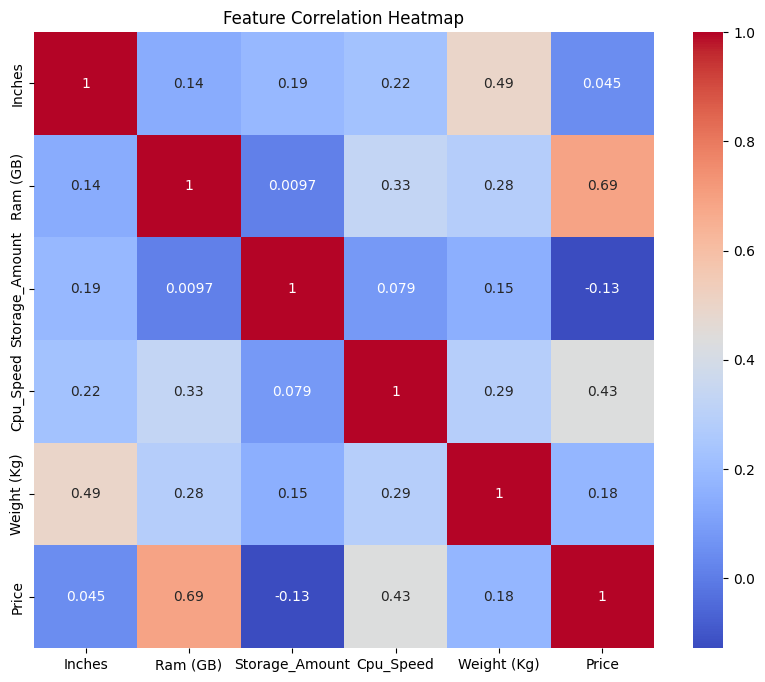

In [435]:
# Numerical features correlation
numerical_features = ['Inches', 'Ram (GB)', 'Storage_Amount', 'Cpu_Speed', 'Weight (Kg)', 'Price']
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Ram (GB) → 0.69 (Strong Positive)
# More RAM = Higher price. This makes sense since RAM is a critical performance factor.

# Cpu_Speed → 0.43 (Moderate Positive)
# Faster CPUs cost more, though the relationship isn’t as strong as RAM.

# Storage_Amount → 0.30 (Weak Positive)
# Larger storage drives prices up slightly.

# Inches vs. Weight (Kg) → 0.49 (Moderate Positive)
# Larger screens = heavier laptops (expected).

# Ram (GB) vs. Cpu_Speed → 0.33 (Moderate Positive)
# Higher RAM often pairs with faster CPUs (common in premium laptops).

In [436]:
# Q1
filter = df[
    (df['Ram (GB)'] >= 16) &
    (df['Storage_Type'] == 'SSD') &
    (df['Company'].isin(['Apple', 'Dell']))
]

highest_priced = filter.nlargest(1, 'Price')[['Company', 'TypeName', 'Ram (GB)', 'Storage_Amount', 'Price']]
print(highest_priced)

print("-------------------------------------------------------")

# Q2
specs = df[
    (df['Ram (GB)'] == 8) &
    (df['Storage_Amount'] == 256)
]

ips_price = specs[specs['Panel_Type'] == 'IPS']['Price'].mean()
non_ips_price = specs[specs['Panel_Type'] == 'Non-Ips']['Price'].mean()  # Or use 'Non-IPS' if labeled

price_diff = ips_price - non_ips_price
print(f"Average Ips price: {ips_price}")
print(f"Average Non Ips price: {non_ips_price}")
print(f"Average price difference: ${abs(price_diff):.2f}")

print("-------------------------------------------------------")

# Q3
result = df.groupby('TypeName').apply(
    lambda x: (x['Cpu_Speed'] / x['Price']).mean()
).sort_values(ascending=False)

print(result)

    Company TypeName  Ram (GB)  Storage_Amount       Price
723    Dell   Gaming        32          1024.0  194972.832
-------------------------------------------------------
Average Ips price: 69779.30714621849
Average Non Ips price: 65908.67375342465
Average price difference: $3870.63
-------------------------------------------------------
TypeName
Netbook               0.000079
Notebook              0.000062
2 in 1 Convertible    0.000038
Gaming                0.000035
Ultrabook             0.000029
Workstation           0.000025
dtype: float64


/tmp/ipykernel_4661/453677684.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('TypeName').apply(


In [437]:
# saving cleaned data
df.to_csv('Cleaned_Laptop_Dataset.csv', index=False)